In [1]:
import matplotlib.pyplot as lt
import numpy as np
import torch
from torch_geometric.datasets import QM9,ZINC
import networkx as nx
from utils import to_network,truncted_BFS,path2mp,mol_paths


In [3]:
zc=ZINC('dataset/zinc_origin')
qm9=QM9('dataset/QM9')


In [7]:
bonds_dec = {0: '-', 1: '=', 2: '#', 3: '~'}
qm9_node_type={'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4}
qm9_id2ele={v:k for k,v in qm9_node_type.items()}


zinc_bond_dict = {1: '-', 2: '=', 3: '#'}
zinc_bond_dec = {0:' ', 1: '-', 2: '=', 3: '#'}
zinc_atom_dict = {'C': 0, 'O': 1, 'N': 2, 'F': 3, 'C H1': 4, 'S': 5, 'Cl': 6, 'O -': 7, 'N H1 +': 8, 'Br': 9,
                  'N H3 +': 10, 'N H2 +': 11, 'N +': 12, 'N -': 13, 'S -': 14, 'I': 15, 'P': 16, 'O H1 +': 17,
                  'N H1 -': 18, 'O +': 19, 'S +': 20, 'P H1': 21, 'P H2': 22, 'C H2 -': 23, 'P +': 24, 'S H1 +': 25,
                  'C H1 -': 26, 'P H1 +': 27}
zinc_atom_dict={v:k for k,v in zinc_atom_dict.items()}


In [10]:
index=list(range(qm9.len()))
from random import shuffle
from tqdm import tqdm
shuffle(index)

x=[]
y3=[]
mp3_set=set([])
y4=[]
mp4_set=set([])

for i in tqdm(index):
    t=qm9[i]
    edge_attr=[bonds_dec[int(i)] for i in t.edge_attr.argmax(dim=1)]
    node_attr={k:qm9_id2ele[int(i)] for k,i in enumerate(t.x[:,:5].argmax(dim=1))}
    s=to_network(t.edge_index,edge_attr,node_attr)
    paths=mol_paths(s,4)
    rt=path2mp(s,paths)
    for j in rt[3]:
        if 'H' not in j:
            mp3_set.add(j)
    y3.append(len(mp3_set))
    for j in rt[4]:
        if 'H' not in j:
            mp4_set.add(j)
    y4.append(len(mp4_set))


100%|██████████| 130831/130831 [06:17<00:00, 346.36it/s]


In [11]:
index=list(range(zc.len()))
shuffle(index)

x=[]
y3_zinc=[]
mp3_set=set([])
y4_zinc=[]
mp4_set=set([])
count=0
for i in tqdm(index):
    t=zc[i]
    edge_attr=[zinc_bond_dec[int(i)] for i in t.edge_attr]
    atomx=torch.clip(t.x,max=7)
    atomx=atomx.squeeze()
    node_attr={k:zinc_atom_dict[int(i)] for k,i in enumerate(atomx)}
    s=to_network(t.edge_index,edge_attr,node_attr)
    paths=mol_paths(s,4)
    rt=path2mp(s,paths)
    for j in rt[3]:
        if 'H' not in j:
            mp3_set.add(j)
    y3_zinc.append(len(mp3_set))
    for j in rt[4]:
        if 'H' not in j:
            mp4_set.add(j)
    y4_zinc.append(len(mp4_set))
    count+=1
    if count>40000:
        break

 18%|█▊        | 40000/220011 [02:42<12:12, 245.66it/s]


/data/users/wgj/miniconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/data/users/wgj/miniconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/data/users/wgj/miniconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/users/wgj/miniconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not 

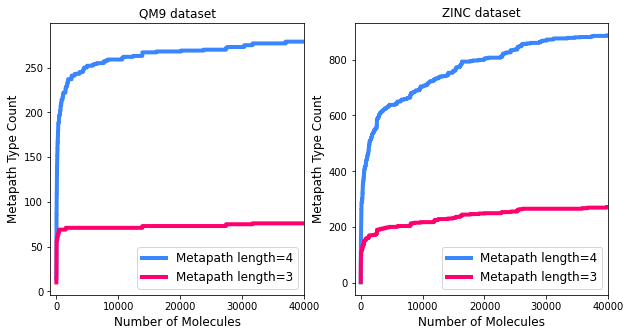

In [12]:

fig,[ax1,ax2]=lt.subplots(nrows=1,ncols=2,figsize=(10,5))
lw=4
ticksize=10
fontsize=12
ax1.plot(list(range(qm9.len())),y4,lw=lw,color='#3A86FF',label='Metapath length=4')
ax1.plot(list(range(qm9.len())),y3,lw=lw,color='#FF006E',label='Metapath length=3')
ax1.set_xlim(-1000,40000)
ax1.set_ylabel('Metapath Type Count',fontsize=fontsize)
ax1.set_xticklabels(ax1.get_xticks(),minor=True,size=ticksize)
ax1.set_yticklabels(ax1.get_yticks(),minor=True,size=ticksize)
ax1.set_xlabel('Number of Molecules',fontsize=fontsize)
ax1.legend(fontsize=fontsize)
ax1.set_title('QM9 dataset',fontsize=fontsize)

#ax1.set_xlim(0,5000)
ax2.plot(list(range(len(y4_zinc))),y4_zinc,lw=lw,color='#3A86FF',label='Metapath length=4')
ax2.plot(list(range(len(y3_zinc))),y3_zinc,lw=lw,color='#FF006E',label='Metapath length=3')
ax2.set_xlim(-1000,40000)
ax2.set_ylabel('Metapath Type Count',fontsize=fontsize)
ax2.set_xticklabels(ax1.get_xticks(),minor=True,size=ticksize)
ax2.set_yticklabels(ax1.get_yticks(),minor=True,size=ticksize)
ax2.set_xlabel('Number of Molecules',fontsize=fontsize)
ax2.legend(fontsize=fontsize)
ax2.set_title('ZINC dataset',fontsize=fontsize)

fig.savefig('src/MPcount.eps')
